In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import warnings 
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
data = pd.DataFrame(boston.data)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [ ]:
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
data.shape

(506, 14)

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

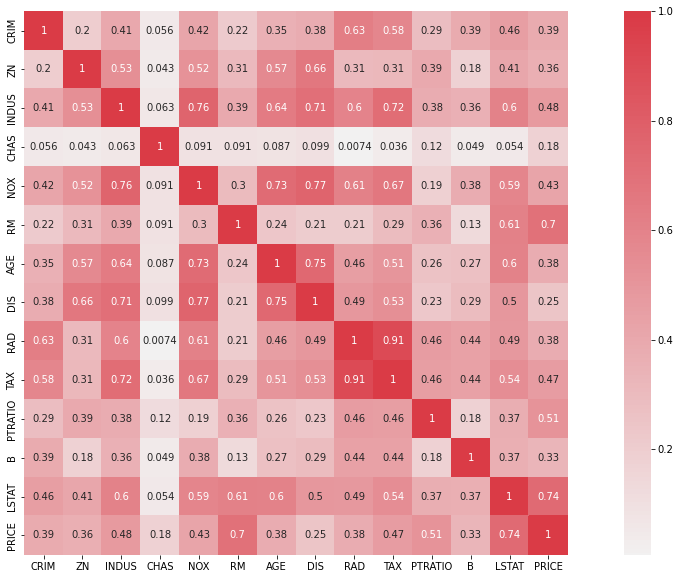

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

cmap = sns.diverging_palette(500, 10, as_cmap=True)

sns.heatmap(data.corr().abs(), cmap=cmap, center=0, square=True, annot =True)

In [ ]:
import random
ix = [(row, col) for row in range(data.shape[0]) for col in range(data.shape[1])]
for row, col in random.sample(ix, int(round(.01*len(ix)))):
    data.iat[row, col] = np.nan

In [ ]:
data = data.mask(np.random.random(data.shape) < .01)

In [ ]:
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
data.isnull().sum()

CRIM       10
ZN         13
INDUS      12
CHAS        9
NOX        10
RM         13
AGE         5
DIS        12
RAD         1
TAX         8
PTRATIO    11
B           9
LSTAT      14
PRICE      13
dtype: int64

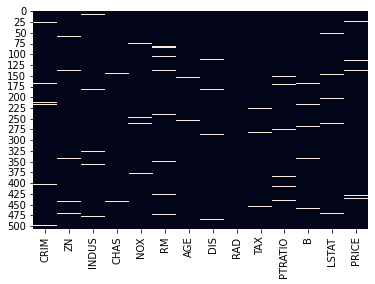

In [ ]:
sns.heatmap(data.isnull(),
cbar=False)
plt.show()

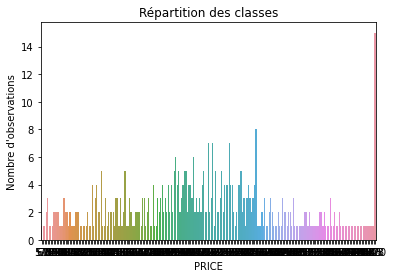

In [ ]:
plt.title("Répartition des classes")
sns.countplot(x='PRICE',data=data)
plt.ylabel("Nombre d'observations")
plt.show()

In [ ]:
data.dropna(subset=['DIS'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.NOX.fillna(0.469,inplace=True)
data.head()
data.PRICE.fillna(35.3,inplace=True)
data.head()
data.LSTAT.fillna(3.9,inplace=True)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
numeric_cols = data._get_numeric_data().columns  # numeric columns
cols = data.columns  # all columns
categorical_cols = list(set(cols) - set(numeric_cols))
categorical_cols 

[]

In [ ]:

#LSTAT     

In [ ]:
most_f_imputer = SimpleImputer(missing_values=np.nan,
strategy='most_frequent')
arr=most_f_imputer.fit_transform(data[['CRIM']])
data['CRIM']=pd.DataFrame(arr,columns=['CRIM'])

arr=most_f_imputer.fit_transform(data[['ZN']])
data['ZN']=pd.DataFrame(arr,columns=['ZN'])

arr=most_f_imputer.fit_transform(data[['INDUS']])
data['INDUS']=pd.DataFrame(arr,columns=['INDUS'])

arr=most_f_imputer.fit_transform(data[['CHAS']])
data['CHAS']=pd.DataFrame(arr,columns=['CHAS'])

arr=most_f_imputer.fit_transform(data[['RM']])
data['RM']=pd.DataFrame(arr,columns=['RM'])

arr=most_f_imputer.fit_transform(data[['AGE']])
data['AGE']=pd.DataFrame(arr,columns=['AGE'])

arr=most_f_imputer.fit_transform(data[['RAD']])
data['RAD']=pd.DataFrame(arr,columns=['RAD'])

arr=most_f_imputer.fit_transform(data[['TAX']])
data['TAX']=pd.DataFrame(arr,columns=['TAX'])

arr=most_f_imputer.fit_transform(data[['PTRATIO']])
data['PTRATIO']=pd.DataFrame(arr,columns=['PTRATIO'])

arr=most_f_imputer.fit_transform(data[['B']])
data['B']=pd.DataFrame(arr,columns=['B'])

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:

data=data.drop(columns=['ZN', 'CHAS'])



In [ ]:
data

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
490,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
491,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
492,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
arr=most_f_imputer.fit_transform(data[['LSTAT']])
data['LSTAT']=pd.DataFrame(arr,columns=['LSTAT'])
arr=most_f_imputer.fit_transform(data[['PRICE']])
data['PRICE']=pd.DataFrame(arr,columns=['PRICE'])



In [ ]:
data.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

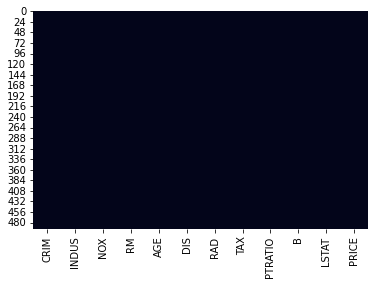

In [ ]:
sns.heatmap(data.isnull(),
cbar=False)
plt.show()

In [ ]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

print ("x=\n",X)
print ("y=\n",y)

x=
 [[6.3200e-03 2.3100e+00 5.3800e-01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 7.0700e+00 4.6900e-01 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 7.0700e+00 4.6900e-01 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 1.1930e+01 5.7300e-01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 1.1930e+01 5.7300e-01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 1.1930e+01 5.7300e-01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
y=
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 35.3 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  35.3 20.9 24.2
 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9 23.9
 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7 43.8
 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)


LinearRegression()

In [ ]:
lm.intercept_

39.61890516256588

In [ ]:
#MODEL EVALUATION
# Model prediction on train data
y_pred = lm.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6217806004344342
Adjusted R^2: 0.609286866514851
MAE: 3.9686353128123306
MSE: 31.497103646284152
RMSE: 5.612228046532335


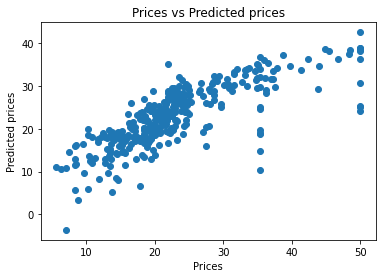

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
#TEST
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6742668654201294
Adjusted R^2: 0.6481131100888988
MAE: 3.7196393983907536
MSE: 29.241075962437385
RMSE: 5.407501822693857


In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9621091248089404
Adjusted R^2: 0.9608574742771036
MAE: 1.174776811594203
MSE: 3.1554511072463707
RMSE: 1.7763589466226613


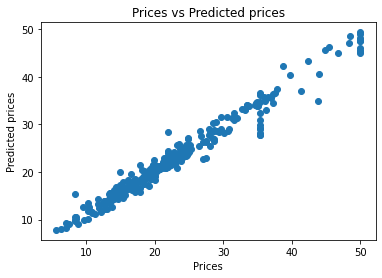

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

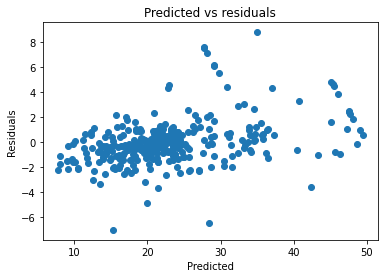

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#For TEST

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8340407877362346
Adjusted R^2: 0.8207155955106767
MAE: 2.498234899328858
MSE: 14.898164838926162
RMSE: 3.859814093829671


In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

[18:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9361305229539629
Adjusted R^2: 0.9340207204088986
MAE: 1.5762222378495812
MSE: 5.318879837109625
RMSE: 2.3062696800481994


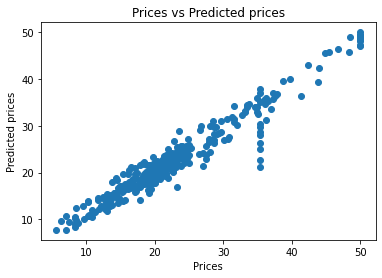

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

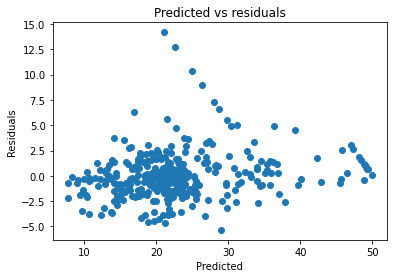

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#TEST
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8378995592219409
Adjusted R^2: 0.8248841953638486
MAE: 2.532197872904323
MSE: 14.551762774915213
RMSE: 3.8146772831938502


In [ ]:
from sklearn.model_selection import train_test_split


print(f"Shape of X_train_dt = {X_train.shape}")
print(f"Shape of X_test_dt = {X_test.shape}")
print(f"Shape of y_train_dt = {y_train.shape}")
print(f"Shape of y_test_dt = {y_test.shape}")

Shape of X_train_dt = (345, 11)
Shape of X_test_dt = (149, 11)
Shape of y_train_dt = (345,)
Shape of y_test_dt = (149,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(X_test)
y_pred[:5]

array([18.4, 13.2, 38.7, 22. , 21.9])

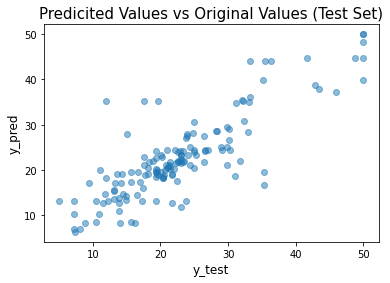

In [ ]:
plt.scatter(x=y_test,y=y_pred,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

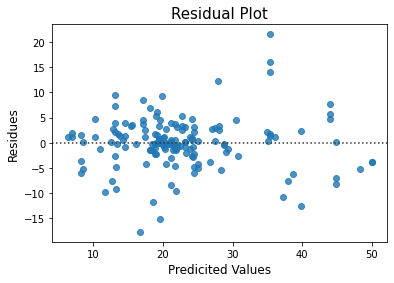

In [ ]:
sns.residplot(y_pred,(y_pred-y_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

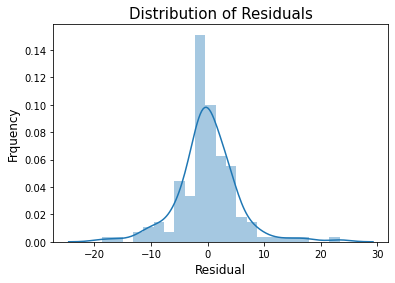

In [ ]:
sns.distplot(y_pred-y_test)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

In [ ]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

R^2 = 0.6813304259217013
Adjusted R^2 = 0.6557438177840278


In [ ]:
from sklearn import metrics
mse_dt = metrics.mean_squared_error(y_test,y_pred)
mae_dt = metrics.mean_absolute_error(y_test,y_pred)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse_dt}',f'Mean Absolute Error: {mae_dt}',f'Root Mean Squared Error: {rmse_dt}',sep='\n')

Mean Squared Error: 28.6069798657718
Mean Absolute Error: 3.606711409395973
Root Mean Squared Error: 5.348549323486865


In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.6813304259217013
Adjusted R^2: 0.6557438177840278
MAE: 3.606711409395973
MSE: 28.6069798657718
RMSE: 5.348549323486865


In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Decision Tree'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,85.89
2,XGBoost,85.14
3,Decision Tree,73.44
0,Linear Regression,63.32


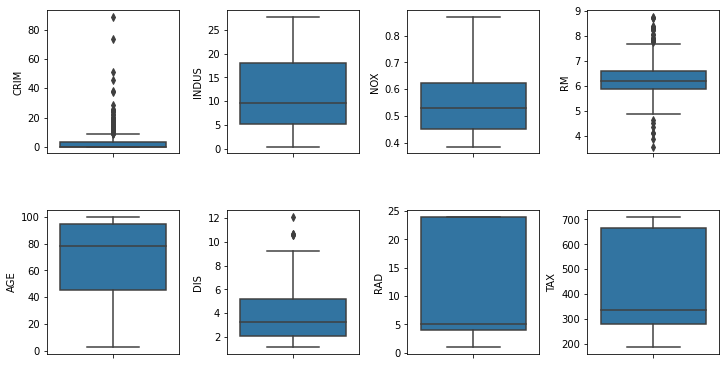

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()

for k,v in data.items():
    if index >= len(axs):
        break
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1800      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,551
Trainable params: 92,551
Non-traina

In [ ]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/300
9/9 [==============================] - 2s 50ms/step - loss: 237.1843 - mae: 12.2964 - val_loss: 204.8996 - val_mae: 11.4311
Epoch 2/300
9/9 [==============================] - 0s 22ms/step - loss: 119.9466 - mae: 8.5463 - val_loss: 77.1508 - val_mae: 6.4802
Epoch 3/300
9/9 [==============================] - 0s 14ms/step - loss: 79.5969 - mae: 6.1924 - val_loss: 85.4449 - val_mae: 7.8167
Epoch 4/300
9/9 [==============================] - 0s 20ms/step - loss: 69.2355 - mae: 6.3265 - val_loss: 87.4968 - val_mae: 6.5591
Epoch 5/300
9/9 [==============================] - 0s 15ms/step - loss: 70.3979 - mae: 6.2130 - val_loss: 75.4306 - val_mae: 6.5138
Epoch 6/300
9/9 [==============================] - 0s 16ms/step - loss: 66.4604 - mae: 5.7837 - val_loss: 73.1330 - val_mae: 6.5207
Epoch 7/300
9/9 [==============================] - 0s 25ms/step - loss: 67.0320 - mae: 5.9939 - val_loss: 75.4963 - val_mae: 6.8068
Epoch 8/300
9/9 [==============================] - 0s 25ms/step - loss:

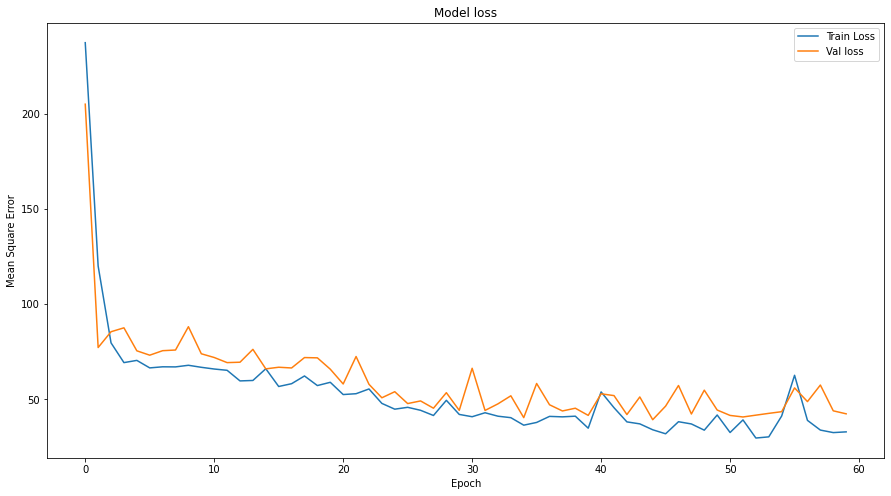

In [ ]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

5/5 [==============================] - 0s 5ms/step - loss: 31.1834 - mae: 3.9139
loss value:  31.1833553314209
Mean absolute error:  3.913853168487549


In [ ]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

5/5 [==============================] - 0s 5ms/step
[21.618721  14.786176  29.24202   22.035683  29.088772  20.884258
 22.516378  21.921711  18.336493  23.172796  34.84478   15.3360405
 19.584229  40.08883   28.550003  20.805948  23.240732  12.171089
 33.322575  14.742474  14.013733  16.422592  24.116451  18.941525
 30.836802  26.638006  17.061451  14.282424  30.47361   10.906419
 21.88873   32.921852  21.127432  28.244951  25.701015  13.80276
 18.437737  16.324425  23.989237  13.916997  30.125488  19.460062
 29.052057   9.503257   9.7522745 23.05425   20.154087  28.117512
 25.671406  15.946484  25.374613  19.38812   11.050926  21.84453
 22.043919  22.304745  25.21241   18.644644  39.00143   22.237158
 23.344494  24.730413  17.526926  35.837505  21.705498  11.004212
 21.50634   24.525085  17.182768  23.01213   18.001827  25.7671
 21.995584  19.260359  18.861897  25.5378    22.826218  20.663256
 11.750403  22.5264    40.881763  20.432013  25.367437  22.460764
 25.186043  37.54408   22.65

In [ ]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,19.3,21.618721
1,23.7,14.786176
2,42.8,29.242020
3,18.9,22.035683
4,23.5,29.088772
5,21.4,20.884258
6,20.6,22.516378
7,20.1,21.921711
8,15.0,18.336493
9,19.3,23.172796


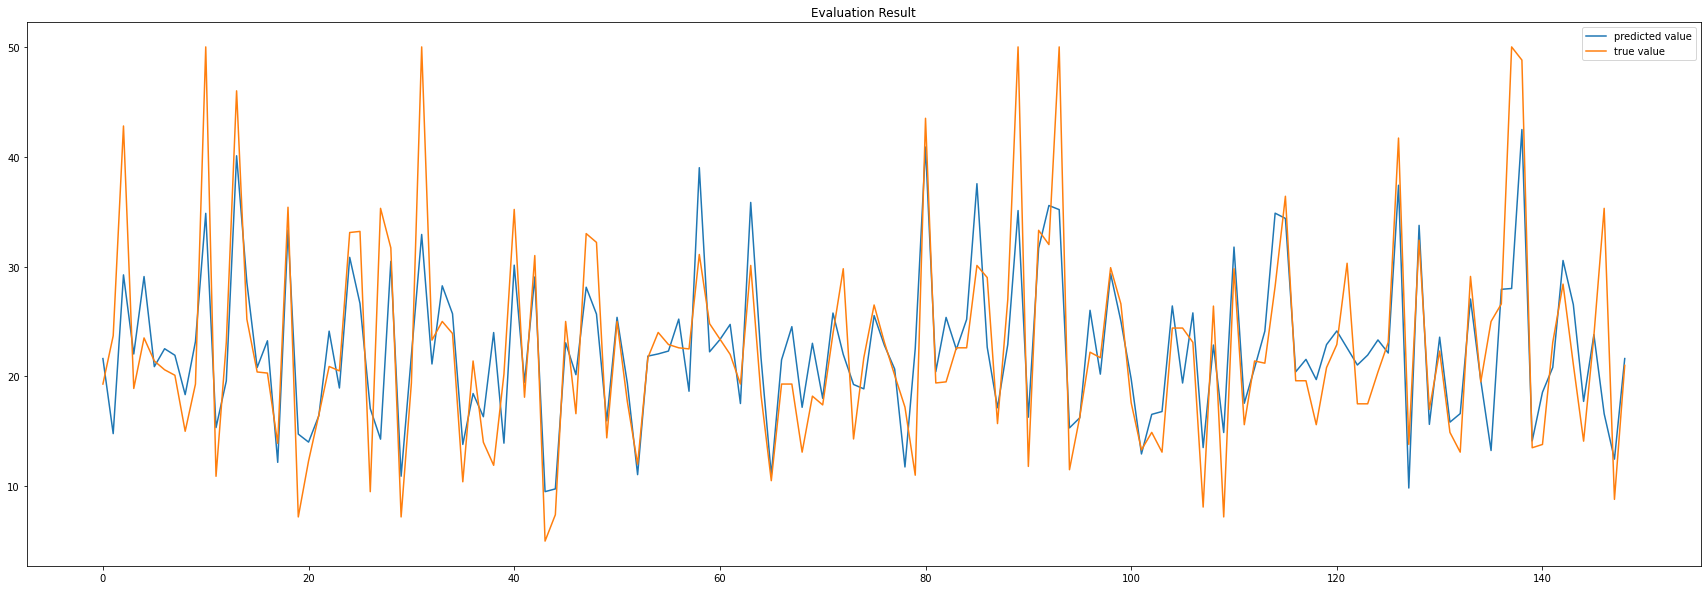

In [ ]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

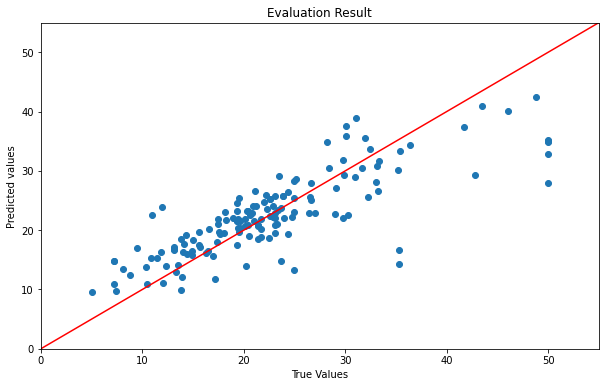

In [ ]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 93%|█████████▎| 39/42 [00:05<00:00,  5.72it/s]

[18:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:05<00:00,  7.06it/s]


In [ ]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.83       0.84  3.81        0.63
XGBRegressor                                 0.82       0.84  3.81        0.12
GradientBoostingRegressor                    0.82       0.84  3.83        0.16
ExtraTreesRegressor                          0.82       0.83  3.89        0.21
BaggingRegressor                             0.81       0.82  3.98        0.13
LGBMRegressor                                0.78       0.80  4.25        0.22
KNeighborsRegressor                          0.78       0.79  4.32        0.01
HistGradientBoostingRegressor                0.77       0.79  4.34        0.19
PoissonRegressor                             0.73       0.75  4.73        0.02
AdaBoostRegressor                            0.67       0.69  5.25        0.11
HuberRegressor                               0.66   